# Qualitative attributes and probability distributions

In this notebook we will explore the following concepts for qualitative attributes:
* frequency and contigency tables
* Marginal probability of a qualitative attribute $P(X)$
* Joint probability distribution of two qualitative attributes $P(X,Y)$
* Conditional probability distribution of qualitative attribues, $P(X|Y), P(Y|X)$
* The relation of the joint to the marginal and the conditional distributions. 
* Bayes theorem. 
We will demonstrate the different concepts using *Titanic* a simple dataset with only qualitative attributes. 

Lets start a small reminder on probabilities and distributions with **qualitative (categorical/discrete)** attributes. We will work with the titanic dataset.

<img src="https://www.gannett-cdn.com/presto/2023/04/13/USAT/acb75fda-723c-4930-9e1b-9436ea7fe4a1-Titanic-topper.png?crop=3399,1912,x221,y414&width=2560" alt="Titanic" width="400" height="300">


It is a dataset that contains one entry per passenger of the 
Titanic. Each passenger is described by the following three qualitative attributes:
* $class  \in \{crew, first, second, third\}$
* $age    \in \{adu, enf\}$
* $gender \in \{ f, m\}$
and the target attribute
* $result \in \{mort, surv\}$
which indicates whether the passenger survived or not.

Normally you have seen already the basic probability concepts in *Mathematics for machine learning, Probabilities and Statistics, 64-41*, Grigorios Anagnostopoulos, [url](https://cyberlearn.hes-so.ch/course/view.php?id=20206)

So lets start by reading the dataset

In [3]:
#give your working directory
setwd("C:/Users/huniv/jnotebook/datasets")

In [5]:
#read titanic.csv
myData <- read.table (file="titanic.csv",sep=",", header=T)

In [6]:
summary(myData)

    class               age                sex               result         
 Length:2201        Length:2201        Length:2201        Length:2201       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [7]:
myData

class,age,sex,result
<chr>,<chr>,<chr>,<chr>
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv
first,adu,m,surv


## Single qualitative attribute X: Frequency table and marginal distribution, P(X) 

Lets start by exploring the distributions of individual attributes e.g. 
the first attribute: *class* and see how we get the $P(class)$.
We call the distribution of a single attribute a **MARGINAL** distribution.
To get to that distribition we first need to retrieve the counts/frequencies of each value of the *class* attribute. The result is what we call the **frequency table** of the *class* attribute.


In [8]:
counts <- table(myData[,1])
print("counts:")
print(counts)


[1] "counts:"

  crew  first second  third 
   873    332    281    715 


From the frequencies we can go to the probabilities of each value of our *class* attribute. How?

In [11]:
probs <- table(myData[,1])/dim(myData)[1]
print("probs:")
print(probs)


[1] "probs:"

     crew     first    second     third 
0.3966379 0.1508405 0.1276692 0.3248523 


Go from the frequencies to probabilities, the easy/R way. The function *prop.table* converts the counts to probabilities and gives us as a result the $P(class)$. It basically divides each entry of the table with the sum of the entries. In this case the result is a vector that contains the probability of each value of the $class$ attribute.


In [12]:
prop.table(table(myData[,1]))



     crew     first    second     third 
0.3966379 0.1508405 0.1276692 0.3248523 

Lets visualise now the distribution of the class variable, i.e. we visualise the $P(class)$, we will use the *barplot* command.

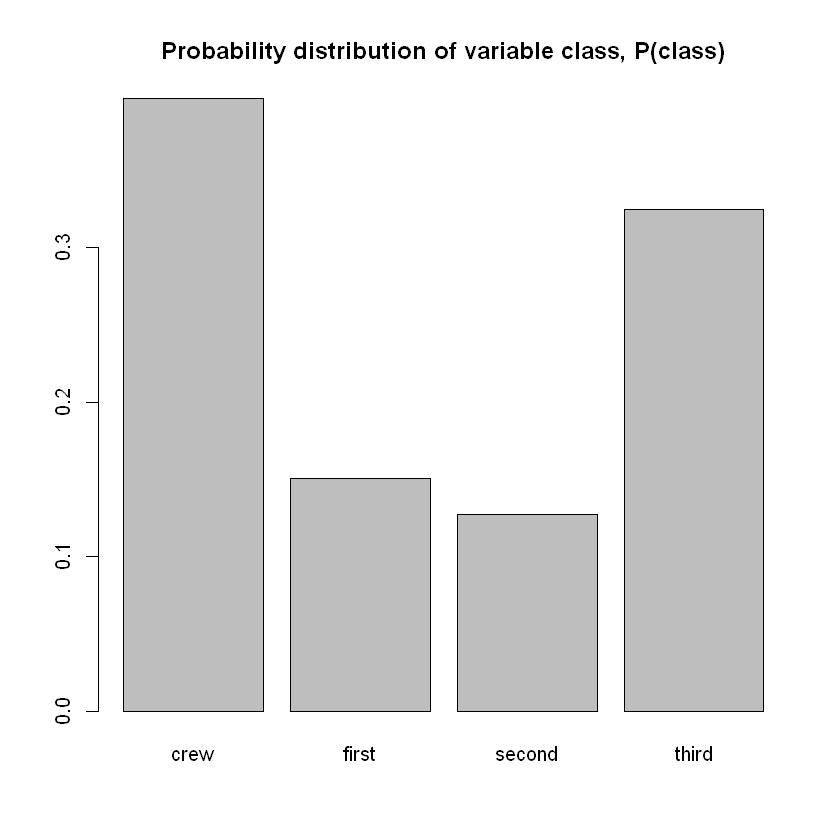

In [13]:
barplot(prop.table(table(myData[,1])), main="Probability distribution of variable class, P(class)")

And make the code a bit more generic by working with a generic index. The command:

```paste("probability of variable:", names(myData)[index])``` 

produces a string that includes the name of the variable whose distribution we want to visualise. Paste concatenates. 


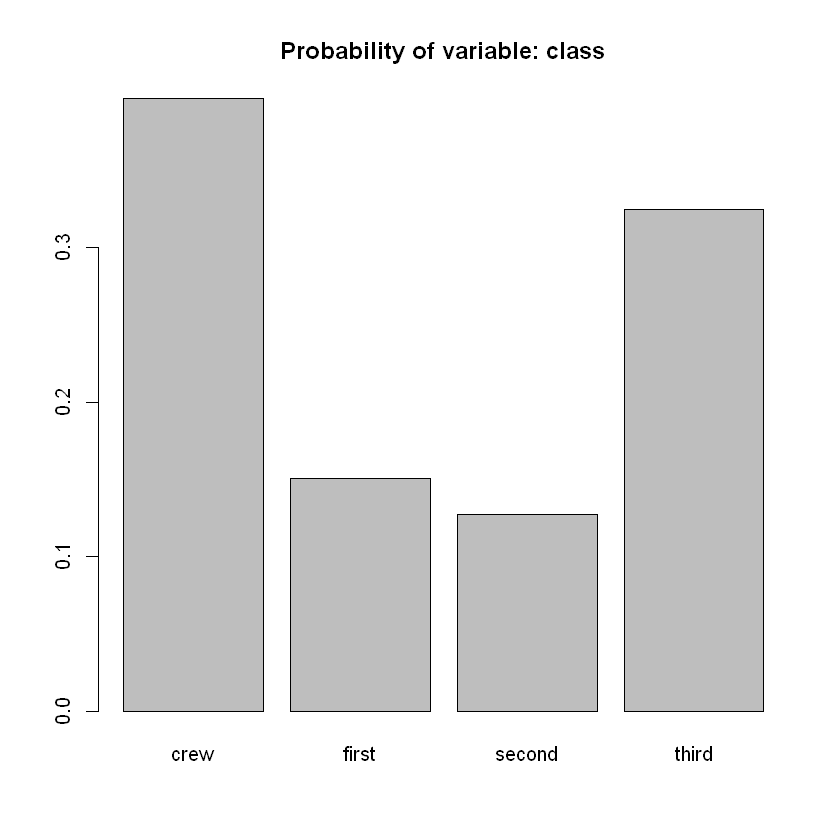

In [14]:
index <- 1
barplot(prop.table(table(myData[,index])), main=paste("Probability of variable:", names(myData)[index]) )

now lets make the same thing for all attributes using a *for loop*


[1] "###################################"
[1] "P(class)"

     crew     first    second     third 
0.3966379 0.1508405 0.1276692 0.3248523 
[1] "###################################"
[1] "P(age)"

       adu        enf 
0.94593367 0.05406633 
[1] "###################################"
[1] "P(sex)"

        f         m 
0.2053612 0.7946388 
[1] "###################################"
[1] "P(result)"

    mort     surv 
0.676965 0.323035 


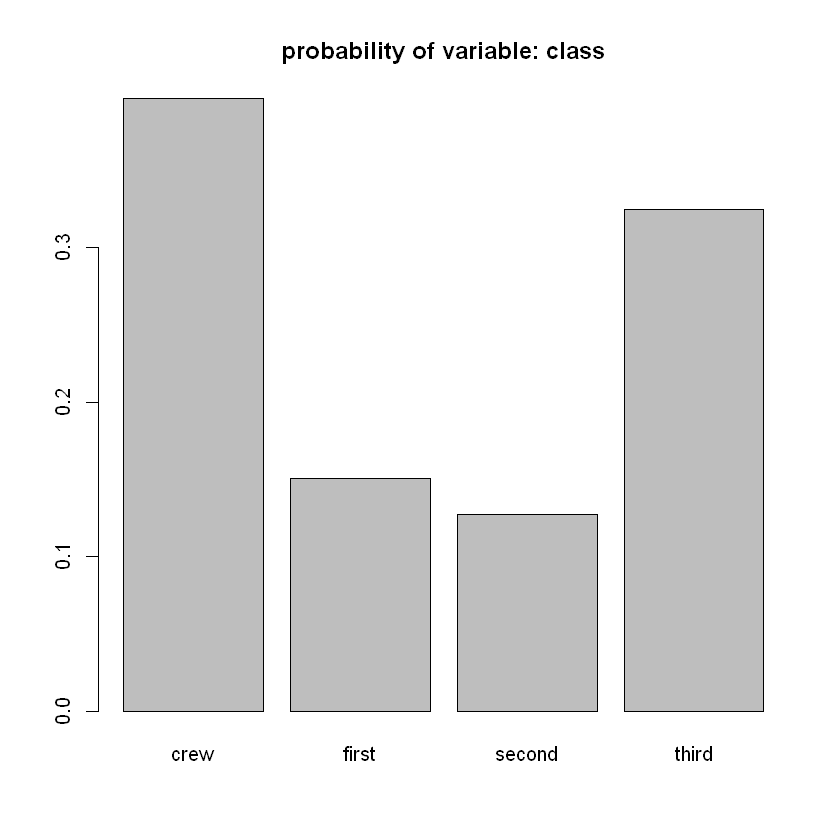

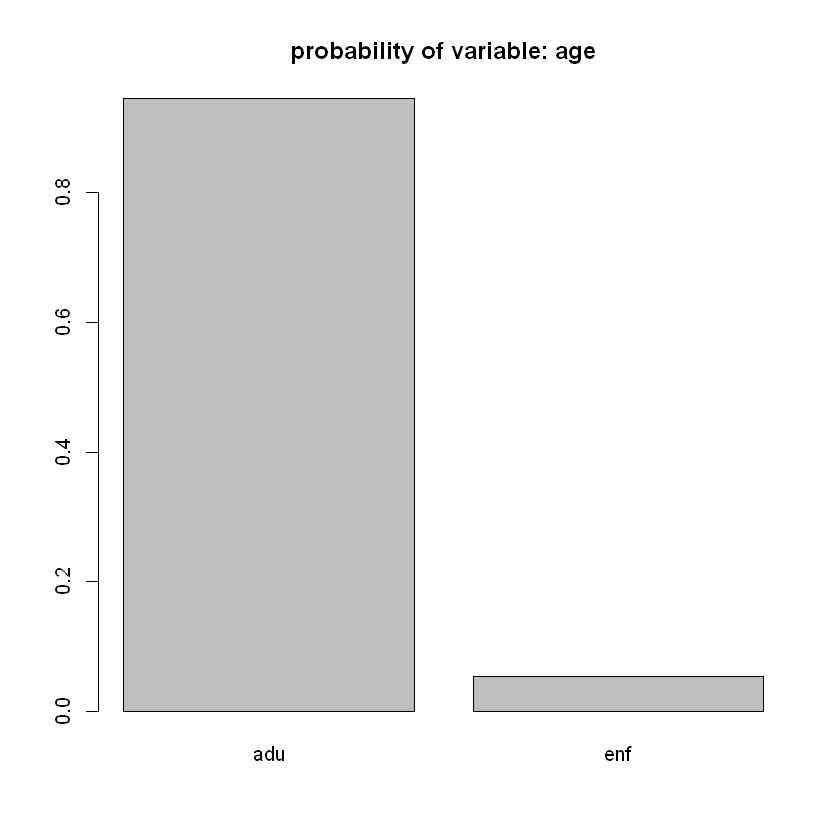

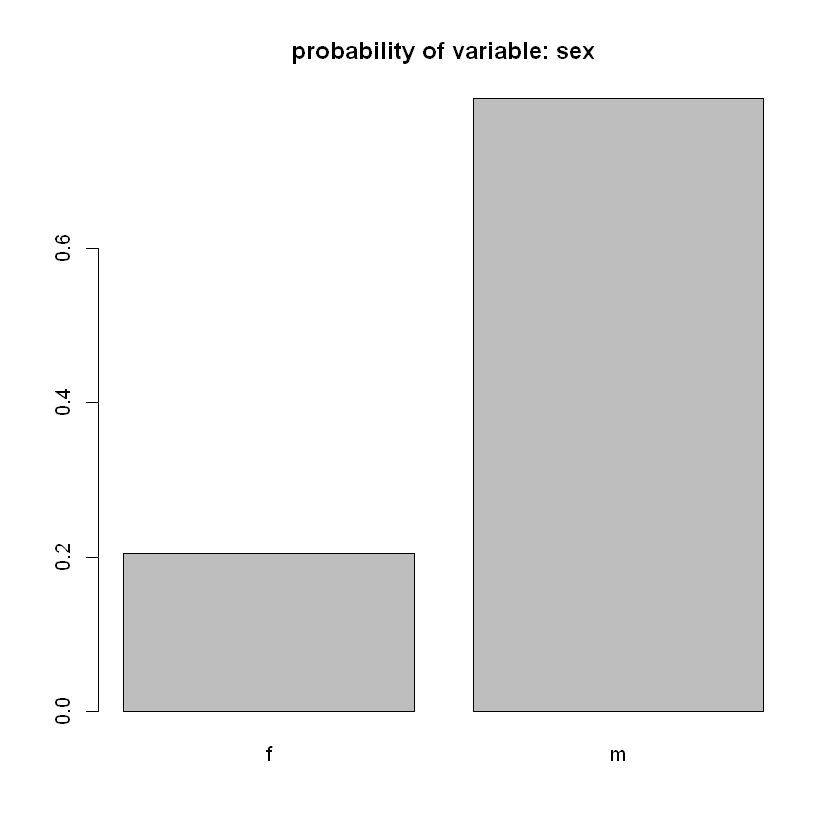

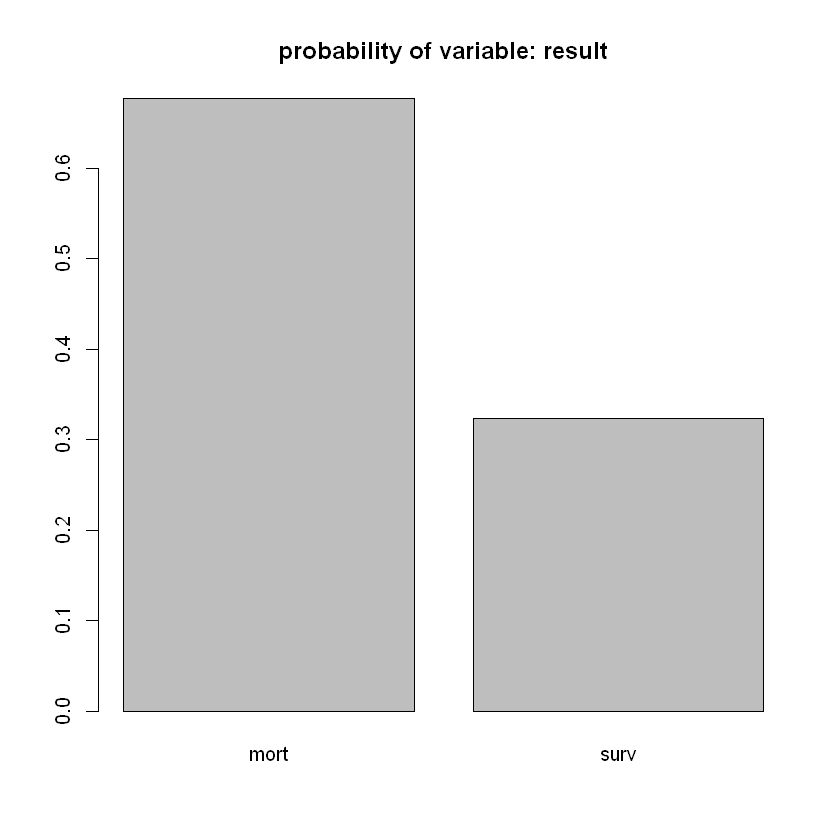

In [16]:
for(index in 1:(dim(myData)[2]) ){
    print("###################################")
    print(paste("P(",names(myData)[index],")",sep=""))
    print(prop.table(table(myData[,index])))
}

for(index in 1:(dim(myData)[2]) ){
	barplot(prop.table(table(myData[,index])), main=paste("probability of variable:", names(myData)[index]) )
}

Lets use the following cartoon picture as a guide to understand the concepts of probabilities (they are equivalent to two of our barplots above). Here we see two **marginal** distributions, the size of the parallelograms corresponds to all the instances in our dataset, i.e. 100% of the passengers of titanic. We should think of the different colors as the **set of passengers** that have a specific attribute value. 

<img src="ProbabilitiesInTitanic-Slide-marginals-1.png" alt="Marginals" width="400" height="300">

## Pairs of qualitative variables, X,Y: Contigency table and joint distribution P(X,Y)

* the marginal distirbution looks at a single attribute 
* In most cases we want to look at combinations of attributes, two or more,
* and try to understand and model their relation.
* We will work with pairs of attributes and we will proceed as before:
  1. Create the *contigency table* which contains the counts of all value combinations
  2. Use the contigency table to get the joint probability distribution 
 
Lets look at the attributes class and sex and first get the *contigency table*. The contigency table gives us the counts/frequency of every attribute value combination. 			


In [17]:
table(myData[,c(1,3)])

        sex
class      f   m
  crew    19 854
  first  138 194
  second 108 173
  third  187 528

And as in the case of the marginal distributions here also we go to from the contigency table to the **JOINT** probability distribution $P(class, result)$ using the prop.table function which we will then visualise using a barplot. 

In [18]:
#the joint distribution P(class,result)
prop.table(table(myData[,c(1,4)]))

        result
class          mort       surv
  crew   0.30077238 0.09586552
  first  0.05997274 0.09086779
  second 0.07133121 0.05633803
  third  0.24488869 0.07996365

Note how the sum of *all* values in the above table is 1.0

Make sure you understand very well the meaning of the values in the above joint probability distribution table. 

For example: what does the value 0.30077238 correspond to?

* $P(class = crew \text{ AND } result = mort)$ 
* or in other words that probability that if you select one instance at random it will have the values crew **and** mort in the class and result variables, i.e. it will belong to the crew and mort sets/events.

Reminder: In the probability and statistics course you were using the $P(class = crew \cap result = mort)$ notation.


We will use barplot to visualise P(class, result). Barplot will create as many bars as columns in the object we pass as argument, here we pass the joint distribution P(class, result) which has two columns (result attribute) => two bars. Within each bar we will have as many categories as we have lines (class attribute).  

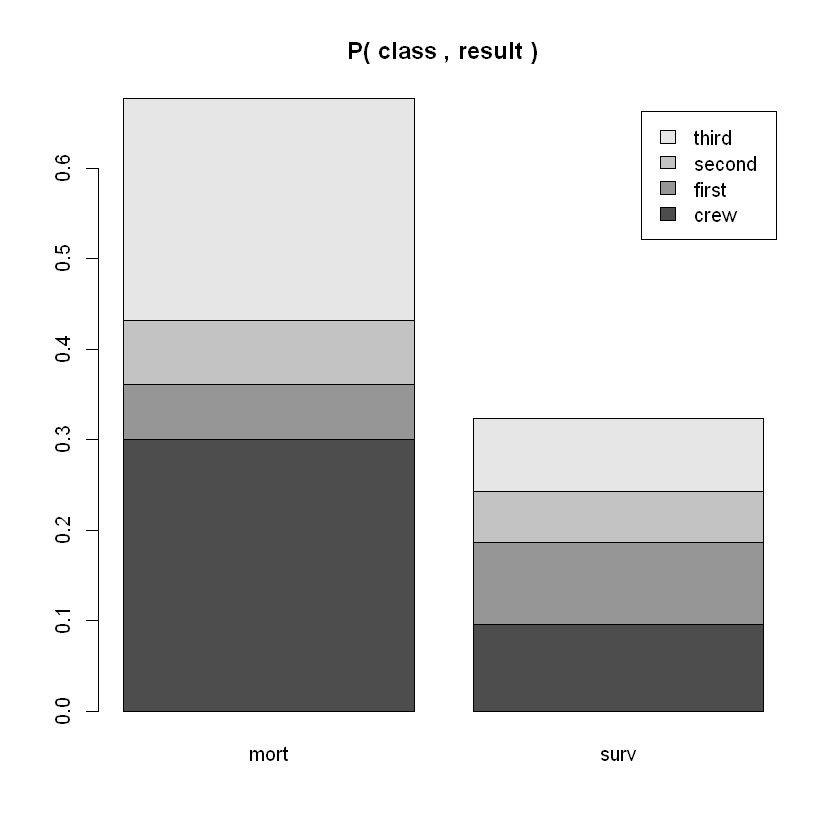

In [19]:
#So lets see it.
title <- paste("P(",names(myData)[1],",",names(myData)[4],")")
barplot(prop.table(table(myData[,c(1,4)])), main=title, legend=T)

What happens if instead of: 
* ```prop.table(table(myData[,c(1,4)]))```

we visualise its transpose:

* ```t(prop.table(table(myData[,c(1,4)])))```

are these two barplots displaying something really different? Not really, but they give us a different view on the same joint distribution.
* visualising the ```prop.table(table(myData[,c(1,4)]))``` we focus on the result attribute
* visualising its transpose we focus on the class attribute
* can we go from the joint to the marginal? i.e. can we compute the P(result) or the P(class) from P(class, result)?

In [ ]:
t(prop.table(table(myData[,c(1,4)])))

title <- paste("P(",names(myData)[1],",",names(myData)[4],")")
barplot(t(prop.table(table(myData[,c(1,4)]))), main=title, legend=T)

Lets try now to understand what the joint distribution tells us.
As before we have the marginal distributions
<img src="ProbabilitiesInTitanic-Slide-marginals-1.png" alt="Marginals" width="400" height="300">

To make our life simpler we will look only at a part of the joint, the: P(result, class=crew)
<img src="ProbabilitiesInTitanic-Slide-joint-2.png" alt="Joint" width="400" height="300">

## Conditional Distributions, P(X|Y), P(Y|X)


The concept of conditional distribution allows us to compute probabilities of certain event happening *given* that we know that something else has already happened. For example in our setting we might want to compute:
* the probability of observing a *crew* among the *mort*, we write this probability as: P(class=crew|result=mort)

In our exploratory data analysis we will use the conditional distributions in order to understand the relation of the different variables to the target variable that we want to predict and get at first an intuitive/qualitative feeling of which are the most informative attributes. 

So now lets see how we can compute the conditional distribution P(class | result).
Conditional means that we will fix the value of the conditioning attribute
here the result, e.g. looking only at instances for which result=mort
or instances for which result=surv. Within these subsets we will compute
the probability of each of the four class values. As before:
* We first compute the contigency table
* and then use prop.table to do the appropriate marginalisation (here the sum per column = 1)

In [ ]:
continTable.class.result<-table(myData[,c(1,4)])

#Get the P(class | result)
#The ",2" argument means that the sum of the entries in each column will be one
prop.table(continTable.class.result,2) 

Observe how above the sum per column = 1

* First column gives the probabilities of *crew, first, second, third* within the *mort* category, which we denote as $P(class|result=mort)$
* Second column gives the probabilities of *crew, first, second, third* within the *surv* category, which we  denote as $P(class|result=surv)$
* We denote $\{ P(class|result=mort), P(class|result=surv)\}$ by $P(class|result)$

So lets visualise the P(class|result)

In [ ]:
#barplot will create one bar/column of its argumane
barplot(prop.table(continTable.class.result,2), main="P(class|result)", legend=TRUE)

In a similar manner we can get the conditional distribution of P(result|class)
where here we will be fixing the values in the row variable, i.e. the class

In [ ]:
continTable.class.result<-table(myData[,c(1,4)])

#Get the P(result | class)
prop.table(continTable.class.result,1) 

Observe now how the sum per line = 1

First line gives the probablities of *mort* and *surv* within the class *crew*, which we can collectivelly denote as $P(result|class=crew)$

How should we use barplot to visualise P(result | class)? 
* The best way is to have the different bars to correspond to the values of the conditioning attribute, the class
* to do so we should visualise the transpose of the P(result | class) we just computed above, attention it does not change anything, it is just for visualisation purposes. 

In [ ]:
prop.table(continTable.class.result,1) 

In [ ]:
t(prop.table(continTable.class.result,1))

In [ ]:
barplot(t(prop.table(continTable.class.result,1)), main="P(result|class)", legend=TRUE) 

So looking at $P(result|class)$ can you say what is the class that has highest/lowest probability of survival?

An *informative attribute* is one whose value significantly affects the target variable probability. 

This is exactly the type of questions we would be looking to answer for the target attribute, i.e. are there particular combinations of predictive attribute values that make one value of the target attribute more or less probable? 

Eventually we will build models that given an instance will output the most probable class. 

So lets explore the relation of each predictive attribute of titanic with the result attribute by computing and visualising the conditional distributions. 

In [ ]:
#Get and visualise the P(result | class)
prop.table(table(myData[,c(1,4)]),1) 
barplot(t(prop.table(table(myData[,c(1,4)]),1) ), main="P(result|class)",legend=TRUE)

In [ ]:
#Get and visualise the P(result | age)
prop.table(table(myData[,c(2,4)]),1) 
barplot(t(prop.table(table(myData[,c(2,4)]),1) ), main="P(result|age)",legend=TRUE)

In [ ]:
#Get and visualise the P(result | sex)
prop.table(table(myData[,c(3,4)]),1) 
barplot(t(prop.table(table(myData[,c(3,4)]),1) ), main="P(result|sex)",legend=TRUE)

In [ ]:
#lets facilitate our lives and put them next to each other
par(mfrow = c(1, 3))
barplot(t(prop.table(table(myData[,c(1,4)]),1) ), main="P(result|class)",legend=TRUE)
barplot(t(prop.table(table(myData[,c(2,4)]),1) ), main="P(result|age)",legend=TRUE)
barplot(t(prop.table(table(myData[,c(3,4)]),1) ), main="P(result|sex)",legend=TRUE)

In fact each of the P(Y|X) should be explored together with the P(X), we do not only want to have a change in the P(Y|X), but we also want to make sure that where ever the probability changes a lot we also have high probability in P(X).

In [ ]:
#lets facilitate our lives and put them next to each other
par(mfrow = c(2, 3))
barplot(t(prop.table(table(myData[,c(1,4)]),1) ), main="P(result|class)",legend=TRUE)
barplot(t(prop.table(table(myData[,c(2,4)]),1) ), main="P(result|age)",legend=TRUE)
barplot(t(prop.table(table(myData[,c(3,4)]),1) ), main="P(result|sex)",legend=TRUE)

barplot(prop.table(table(myData[,1])), main="P(class)",legend=TRUE)
barplot(prop.table(table(myData[,2])), main="P(age)",legend=TRUE)
barplot(prop.table(table(myData[,3])), main="P(sex)",legend=TRUE)

So looking at the above graphs:
* which is the attribute that you think brings most information about the result attribute? 
* give the instance that
  * has the highest probability of mort
  * the highest probability of surv

*We will need to answer such questions* in the exploratory analysis of the dataset we will work with in the project. 

## On the relation of the joint distribution P(X,Y) and the marginal distributions P(X) and P(Y)

Can we get from the from the joint distribution P(class, result) the probability P(result=mort) as well as the probability P(result=surv)? (These two probabilities give the marginal distribution P(result))

In [ ]:
#the joint distribution P(class,result)
prop.table(table(myData[,c(1,4)]))

#And its bar plot
title <- paste("P(",names(myData)[1],",",names(myData)[4],")")
barplot(prop.table(table(myData[,c(1,4)])), main=title, legend=T)

Yes! It is the height of the column that corresponds to *result=mort* and the 
height of the column that corresponds to *result=surv*. 
These heights are nothing else than sums of probabilities over the rows for each column.  

```        result
class          mort       surv
  crew   0.30077238 0.09586552
  first  0.05997274 0.09086779
  second 0.07133121 0.05633803
  third  0.24488869 0.07996365 
  
               ||
               ||
               \/
         sum over the rows 
               ||
               ||
               \/
         P(mort)       P(surv)
  
  
  ```

When we are summing we are marginalising out one (or more) dimensions of the joint distribution, this is why we call the result the **MARGINAL distribution**, so the marginal distribution of result, P(result) is given by:

$\begin{eqnarray} 
P(result=surv) & =  P(class=crew, result=surv) \\
               & + P(class=first, result=surv) \\
               & + P(class=second, result=surv) \\
               & + P(class=third, result=surv) \\
               & =\sum_{class \in \{ first, second, third, crew\} } P(class, result = surv)
\end{eqnarray} $

$\begin{eqnarray} P(result = mort) & = P(class=crew, result = mort) \\
                                   & + P(class=first, result = mort) \\
                                   & + P(class=second, result = mort) \\
                                   & + P(class=third, result = mort) \\
                                   & =\sum_{class \in \{ first, second, third, crew\} } P(class, result = mort)
                                   \end{eqnarray} $

A compact way of writing the two equations above is:
$$P(result) = \sum_{class} P(class,result)$$  


So lets verify this by doing the sum of the row values for each column of $P(class,result)$ with the help of the colSums function which adds the values of the rows for each column

In [ ]:
colSums(prop.table(table(myData[,c(1,4)])))

We can check that it is correct by looking directly at $P(result)$ as we did before

In [ ]:
prop.table(table(myData[,4]))

We can do exactly the same with P(class,result) by marginalising out the column variable, i.e. result, now we will be summing over the rows.

In [ ]:
#the joint distribution
prop.table(table(myData[,c(1,4)]))

#and its marginalisation over the column variable sex, using rowSums
rowSums(prop.table(table(myData[,c(1,4)])))

and again just to be sure:

In [ ]:
#P(class)
prop.table(table(myData[,1]))

So given the $P(class, result)$ by marginalising over the lines or the columns we are removing one
of the two attributes and obtain the MARGINAL distribution of the other attribute:

```
        result
class          mort       surv
  crew   0.30077238 0.09586552                                               P(crew)
  first  0.05997274 0.09086779  ====> sum over the columns (rowSums) =====>  P(first)
  second 0.07133121 0.05633803                                               P(second)
  third  0.24488869 0.07996365                                               P(third)

               ||
               ||
               \/
         sum over the rows (colSums)
               ||
               ||
               \/
         P(mort)       P(surv)
```


## On the relation of the Joint distribution P(X,Y) and the conditional distributions P(X|Y) and P(Y|X)

* We saw before that from the joint distribution P(X,Y) we can obtain the two marginal ones by marginalising over the line or the column attribute. 
* We can also go from the joint to each one of the two conditionals by appropriate marginalisation

In [ ]:
#So lets get again the joint distribution P(class,result) and then see how we can get P(result | class)
counts<-table(myData[,c(1,4)])
P.class.result <- prop.table(counts)
print(P.class.result)

Attention the sum of the probabilities in the joint distribution is 1.0

**Question**: Any idea what operation I should do in the above table to get P(result|class)?
* Hint1: in P(result|class) the sum is 1.0 on the lines or on the columns?
* Hint2: with what simple operation I could achieve the above?





**Answer**: 
* Just divide each element of a given line (e.g. crew) with the sum of probabilities of that line
* To what does the sum of probabilities of a line correspond to?
  * the probability of the value of the line, e.g. P(crew) for the first line

```
P(result | class):
         result
class          mort               surv
  crew   0.30077238/P(crew)   0.09586552/P(crew)
  first  0.05997274/P(first)  0.09086779/P(first)
  second 0.07133121/P(second) 0.05633803/P(second)
  third  0.24488869/P(third)  0.07996365/P(third) 
```

what we actually have in the above table is: 

```
P(result | class):
         result
class          mort                         surv
  crew   P(crew and mort)/P(crew)     P(crew and surv)/P(crew)
  first  P(first and mort)/P(first)   P(first and surv)/P(first)
  second P(second and mort)/P(second) P(second and surv)/P(second)
  third  P(third and mort)/P(third)   P(third and surv)/P(third) 
```

which can be summarised as: $$P(result|class) = \frac{P(class \text{ and }result)}{P(class)}$$

So lets go back to our cartoon visualisation to get a better intuition for the conditional probabilities. We have the two marginals:
<img src="ProbabilitiesInTitanic-Slide-marginals-1.png" alt="Marginals" width="400" height="300">


And the part of the joint which we saw before, P(result, class=crew):
<img src="ProbabilitiesInTitanic-Slide-joint-2.png" alt="Joint" width="400" height="300">

We will visualise the relation of the conditional to the joint and the marginal. We will focus only on the **crew** instances and we will compute the P(result=mort | class = crew) and P(result=surv | class = crew) using the joint P(result, class=crew) and the marginal P(class=crew). Now instead of looking at all the instances we are looking only on the crew ones and within the set of crew we compute the proportion of surv and the proportion of mort. 

<img src="ProbabilitiesInTitanic-Slide-conditional-3.png" alt="Joint" width="400" height="300">


So lets try to compute the P(result | class ) by:
1. computing the joint P(class, result)
2. computing the marginal P(class) 
3. and dividing the appropriate entries of the joint probability matrix with the respective class probability.


In [ ]:
print("############################")
print("P(class, result)")
print(P.class.result)

print("############################")
#get the margin P(class) from the joint P(class,result)
P.class <- rowSums(P.class.result)
print("P(class)")
print(P.class)

print("############################")
print(" The / based computation of the conditional")
P.result.given.class <- P.class.result / P.class # this operation divides each element 
                                                 # of the ith line of the P.class.result matrix 
                                                 # with the ith entry of the P.class vector 
                                                 # R recycles (repeats) the vector elements
                                                 # over the matrix columns. 
print("P(result|class)")
print(P.result.given.class)


print("The sweep based computation of the conditional")
P.result.given.class <- sweep(P.class.result,1,P.class, FUN="/") #same result, repeats P.class over the 
                                                                 #lines of the P.class.result matrix and
                                                                 #applies the / operation
print("P(result|class)")
print(P.result.given.class)
print("############################")

#check the result (sum over the rows==1)
rowSums(P.result.given.class)
print("############################")

So given the $P(class, result)$ and normalising (/) each row by the respective class probability we obtain the $P(result|class)$

```
P(class, result)                                 P(result|class)
        result                                           result
class          mort       surv                  class         mort      surv
  crew   0.30077238 0.09586552                    crew   0.7583047 0.2416953
  first  0.05997274 0.09086779 rows / P(class)    first  0.3975904 0.6024096
  second 0.07133121 0.05633803 ==============>    second 0.5587189 0.4412811
  third  0.24488869 0.07996365                    third  0.7538462 0.2461538
```
Nothing else than the application of the :
$$P(result|class) = \frac{P(class \text{ and }result)}{P(class)}$$

We can achieve the same result, i.e. get the conditional distirbution directly from the contigency table and marginalising over the lines

In [ ]:
P.result.given.class.v2 <- prop.table(counts, 1)
print(P.class.given.result.v2)
#check the result (sum over the rows==1)
rowSums(P.result.given.class.v2)

**Exercise**: get the P(class | result) 

In [ ]:
print("########################")
print("P(class, result)")
print(P.class.result)

print("########################")
#get the marginal P(result) from the joint P(class,result)
P.result <- colSums(P.class.result)
print("P(result):")
print(P.result)

print("########################")
#P.result.given.class <- P.class.result / P.result      # this one does not work as we would like
                                                        # i.e. dividing column i of P.class.result 
                                                        # with the i entry of the P.result vector, 
                                                        # instead it divides its line of the matrix
                                                        # with a given element in the vector and then
                                                        # repeats the elements of the vector as needed

P.class.given.result<- t(t(P.class.result) / P.result) # we play with the transpose to make the dimensions match
print("P(class|result):")
print(P.class.given.result)

P.class.given.result <- sweep(P.class.result, 2, P.result, FUN="/") #same as the above
print("P(class|result):")
print(P.class.given.result)


print("########################")
print("Check:")
print(colSums(P.class.given.result))

In [ ]:
#getting it directly from the counts
P.class.given.result.v2 <- prop.table(counts, 2)
print("P(class|result)")
print(P.class.given.result.v2)
print("Check:")
print(colSums(P.class.given.result.v2))

So what we did to get P(class|result) ? 
* Just divide each element of a given column (e.g. mortw) with the sum of probabilities of that column
* To what does the sum of probabilities of a column correspond to?
  * the probability of the value of the column, e.g. P(mort) for the first column

```
P(class | result):
         result
class          mort               surv
  crew   0.30077238/P(mort)  0.09586552/P(surv)
  first  0.05997274/P(mort)  0.09086779/P(surv)
  second 0.07133121/P(mort)  0.05633803/P(surv)
  third  0.24488869/P(mort)  0.07996365/P(surv) 
```

what we actually have in the above table is: 

```
P(class | result):
         result
class          mort                         surv
  crew   P(crew and mort)/P(mort)    P(crew and surv)/P(surv)
  first  P(first and mort)/P(mort)   P(first and surv)/P(surv)
  second P(second and mort)/P(mort)  P(second and surv)/P(surv)
  third  P(third and mort)/P(mort)   P(third and surv)/Psurv) 
```

which can be summarised as: $$P(class|result) = \frac{P(class \text{ and }result)}{P(result)}$$

Once more 

```
P(class, result)
        result
class          mort       surv
  crew   0.30077238 0.09586552
  first  0.05997274 0.09086779
  second 0.07133121 0.05633803
  third  0.24488869 0.07996365
                   ||
                   ||
                   || columns / P(result)
                   ||
                   ||
                   \/
P(result | class)
        result
class          mort       surv
  crew   0.4442953 0.2967651
  first  0.0885906 0.2812940
  second 0.1053691 0.1744023
  third  0.3617450 0.2475387
```

And putting them altogether: we can go from the joint $P(class, result)$ to any of the conditionals $P(class|result)$ or $P(result|class)$

```
P(class, result)                                 P(class|result)
        result                                           result
class          mort       surv                  class         mort      surv
  crew   0.30077238 0.09586552                    crew   0.7583047 0.2416953
  first  0.05997274 0.09086779 rows / P(class)    first  0.3975904 0.6024096
  second 0.07133121 0.05633803 ==============>    second 0.5587189 0.4412811
  third  0.24488869 0.07996365                    third  0.7538462 0.2461538
                   ||
                   ||
                   || columns / P(result)
                   ||
                   ||
                   \/
P(result | class)
        result
class          mort       surv
  crew   0.4442953 0.2967651
  first  0.0885906 0.2812940
  second 0.1053691 0.1744023
  third  0.3617450 0.2475387




```

In [ ]:
#Lets visualise using barplots the three distributions above, P(Class, result), P(class|result), P(result|class)
par(mfrow = c(1, 2))
barplot(P.class.result, main="P(class,result)")
barplot(P.class.given.result, main="P(class|result)")

par(mfrow = c(1, 2))
barplot(t(P.class.result), main="P(result, class)")
barplot(t(P.result.given.class), main="P(result|class)")
#observe once again how the conditionals take the joint and they rescale parts of it (the conditioning variable)

## Bayes Rule

<img src="https://www.the-tls.co.uk/wp-content/uploads/sites/7/2019/11/Thomas-Bayes.jpg?resize=1024,576" alt="Bayes" width="400" height="300">

We have seen above how the joint and the conditionals relate to each other:
* $P(X|Y) = \frac{P(X,Y)}{P(Y)}$
* $P(Y|X) = \frac{P(X,Y)}{P(X)}$
solving in the two above equations for $P(X,Y)$ will give us respectivelly 
* $P(X,Y) = P(X|Y) P(Y)$
* $P(X,Y) = P(Y|X) P(X)$

thus:

* $P(X|Y) P(Y) = P(Y|X) P(X) \Rightarrow P(Y|X) = \frac{P(X|Y) P(Y)}{P(X)}$

The identity: 
$$P(Y|X) = \frac{P(X|Y) P(Y)}{P(X)}$$
is known as the Bayes rule, it allows us to go from one conditional to the other. Its part in this rule has a particular name: 
$$ \text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{evidence}} $$


The Bayes rule is the basis of the Naive Bayes algorithm that we will see later. 

## Exercises 

* Compute the probability of an instance being a child (enf), 
* which distribution you need to compute in order to get that probability? is it a marginal, joint or conditional distribution?
* visualise that distribution

In [ ]:
#Your code/answers here

* Compute the probability of an instance being adult and first class
* which distribution you need to compute in order to get that probability? is it a marginal, joint or conditional? explain your reasoning. 
* visualise that distribution in two different ways
* Explain how from that distribution you can go to the P(adult) and P(class)

In [ ]:
#Your code/answers here

* Compute what is the proportion of women among the dead passengers
* which distribution you need to compute in order to get that probability? is it a marginal, joint or conditional? explain your reasoning. 
* visualise that distribution it two different ways and save the result in a pdf file. 

In [ ]:
#Your code/answers here

* Compute and visualise the joint distribution of age and sex
* Using the joint compute the marginals of age and sex, explain how you did it
* Using the joint distributions compute the conditional distribution of age given the sex, and the conditional distribution of sex given age. Visualise the joint and the conditionals and explain their relation. 

Use the Bayes rule to compute the probability $P(result = mort|class=first)$. Verify that what you get agrees with the result that you get when you compute directly the probability from the contigency table as we saw above. 

In [ ]:
#Your code/answer here

## Quantitative attributes and probability distributions

So lets move now to quantitative attributes and explore their probability distributions. We will work with *iris* a dataset that contains quantitative predictive attributes. 

In [ ]:
myData <- read.table(file="iris.csv", header=T, sep=",")

In [ ]:
myData[,1]


In [ ]:
names(myData)

In [ ]:
#lets compute means and variances 
mean(myData[,1])

In [ ]:
#the mean of all the attributes
colMeans(myData[,c(1:4)])

In [ ]:
#variance 
var(myData[,c(1:4)])

In [ ]:
#since the variance is in the diagonal I just need to retrieve the 
#elements in the diagonal
diag(var(myData[,c(1:4)]))

In [ ]:
#so lets first try to visualise the distribution of a single quantitative attribute
hist(myData[,1])

In [ ]:
names(myData)[1]

so we will now try to visualise the conditional distribution of each attribute given the class, and explore in a visual manner whether there is an attribute that helps us best distinguish between the classes. So lets focus at two classes only (even though iris has three): setosa and virginica

In [ ]:
#visualise the two distributions, but we have a bit of a problem with the x-axis which does not
#have exactly the same bins in the two graphs.
hist(myData[ myData[,5]=="Iris_setosa"  ,    1], main="Distribution of sepal_length for setosa")
hist(myData[ myData[,5]=="Iris_virginica"  ,    1], main="Distribution of sepal_length")

In [ ]:
#To force the same bins we are going to use the breaks argument in hist which controls the separation. 
minX <- min(myData[,1])
maxX <- max(myData[,1])

breaks <- seq(from = minX, to = maxX, length.out=20)
print(breaks)

In [ ]:
hist(myData[ myData[,5]=="Iris_setosa"  ,    1], main="Distribution of sepal_length for setosa", breaks=breaks)
hist(myData[ myData[,5]=="Iris_virginica"  ,    1], main="Distribution of sepal_length for virginica", breaks = breaks)

In [ ]:
minX <- min(myData[,2])
maxX <- max(myData[,2])

breaks <- seq(from = minX, to = maxX, length.out=20)

hist(myData[ myData[,5]=="Iris_setosa"  ,    2], main="Distribution of sepal_width for setosa", breaks=breaks)
hist(myData[ myData[,5]=="Iris_virginica"  ,  2], main="Distribution of sepal_width for virginica", breaks=breaks)

so between the two attributes, sepal_width and sepal_length, which one helps us most in determining the target variable? sepal_length because here we have the least overlap between the two distributions P(sepal_length|iris_setosa) and P(sepal_length | iris_virginica)

So how can we quantify the fact that we want the two distributions to be as far as possible and with the smallest overlap? intuitevely we want to have a very large distance of the two class conditional means with a very small variance. So what we are going to compute is $\frac{|\mu_{attribute|virginica} - \mu_{attribute|setosa}|}{\sigma_{attribute}}$, for all attributes

how can we get this class conditional mean  $\mu_{attribute|virginica}$ for all attributes in one go?

In [ ]:
condMeansVrg<-colMeans(myData[myData[,5]=="Iris_virginica",1:4])

In [ ]:
condMeansSts<-colMeans(myData[myData[,5]=="Iris_setosa",1:4])

In [ ]:
abs(condMeansVrg-condMeansSts)

but just the difference of the means is not enough, as we said we need to normalise (i.e. divide) with the standard deviation

In [ ]:
sqrt(diag(var(myData[,1:4])))

In [ ]:
attributesScore<-abs(condMeansVrg-condMeansSts)/sqrt(diag(var(myData[,1:4])))
print(attributesScore)

In [ ]:
#so the score says that the best attribute is the petal width, lets see the class conditional histograms
minX <- min(myData[,4])
maxX <- max(myData[,4])

breaks <- seq(from = minX, to = maxX, length.out=20)

hist(myData[ myData[,5]=="Iris_setosa"  ,    4], main="Distribution of sepal_width for setosa", breaks=breaks)
hist(myData[ myData[,5]=="Iris_virginica"  ,  4], main="Distribution of sepal_width for virginica", breaks=breaks)

So indeed sepal_width has a very good class separation (at least between virginica and setosa)

So lets now take a small look at functions, and make a simple one that for all attributes draws histograms and saves them in a file. 

In [ ]:
#since we can do histograms only on quantitative variables we need to 
#pass the indexes of the quantitative variable. Lets define as default
#value for these indeced the ones of iris, i.e. 1,2,3,4. 
#Attention the graphics folder should exist, because we 
#are going to save all files there. 
visualiseAllHistograms <- function(myData, indexQuant=c(1:4)){
    for( i in indexQuant){
        hist(myData[,i], main = paste("Histogram of attribute", names(myData)[i]))
        
        #and lets save the figure in a .pdf
        dev.copy2pdf(file=paste("graphics/","HistogramOfAttribute",names(myData)[i],".pdf",sep=""))
    }
}

In [ ]:
#no need to pass indexQuantitative since we are working with iris, and we have set a de
#default value to corresponds to iris. 
visualiseAllHistograms(myData)

finally lets make a scatter plot with the best two attributes according to the attributes score computed above and see whether we can distinguish between the two classes with which we worked, i.e. setosa and virginica

In [ ]:
print(attributesScore)

In [ ]:
#A more elaborate filter including an OR |
#lets get only the virginica and setosa classes
myData[myData[,5]=="Iris_virginica" | myData[,5]=="Iris_setosa", 5]

In [ ]:
#same as the previous filter using a NOT
myData[myData[,5]!="Iris_versicolor",5] 

In [ ]:
#so lets use the two best attributes according to the score and see whether they allow us to easily
#separate the two classes
#col is the color of each dagta point which is taken from their class label
plot(myData[myData[,5]!="Iris_versicolor",c(3,4)],col=factor(myData[myData[,5]!="Iris_versicolor",5]),pch=19)
#and lets add a legend
legend("topleft",
       legend = levels(factor(myData[myData[,5]!="Iris_versicolor",5])),
       pch = 19,
       col = factor(levels(factor(myData[myData[,5]!="Iris_versicolor",5]))))